In [349]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="ticks", color_codes=True)
current_palette = sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats.mstats import mode
from scipy.stats import chisquare
from scipy.spatial.distance import jaccard


from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, StandardScaler

import sklearn.preprocessing, sklearn.decomposition,\
       sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn_pandas import gen_features

import time
import datetime
from datetime import date, datetime, timedelta

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

import os

#from plotnine import *
#from plydata import *

In [348]:
cwd = os.getcwd()
cwd


'C:\\Users\\mstre\\Dropbox\\0Big_data\\Xpdia\\Mathieu'

### 1 Import df 

In [350]:
ds2 = pd.read_csv('ds1.csv', sep = "|")
ds2.head(3)

,date_time,site_name,user_location_country,user_location_region,user_location_city,user_location_latitude,user_location_longitude,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,hotel_country,is_booking,hotel_id,prop_is_branded,prop_starrating,distance_band,hist_price_band,popularity_band,cnt,date_ss,date_ci,date_co,month_ss,day_ss,hour_ss,month_ci,day_ci,month_co,day_co,date_ss1,month_ci1,month_co1,season_cat,LOS,LOS_range,LOS_cat,is_satsun_ss,is_worktime_ss,is_satsun,is_monfri,BW_ss,BW_ss_range,BW_ss_cat,city_state,region_dest,user_cat,channel_cat,state,2015_hh_med_inc_state,income_hh,income_hh_range,income_hh_cat,USD_id,USD_ids,is_churn,is_session,is_prebooking,session_cat,is_churns,is_prebookings,session_cats,year_rank_ss,season_dest_rank_ss,timedelta_ss,package_income_t,mobile_BW_t,hotel_band,cluster_id
0,2015-01-01 00:03:00,EXPEDIA.COM,UNITED STATES OF AMERICA,OH,WEST CHESTER,39.328640,-84.425730,775.8321,-803007886,0,0,324,2015-01-22,2015-01-23,2,0,1,5527237,UNITED STATES OF AMERICA,0,153390727,1,3,C,H,H,1,2015-01-01 00:03:00,2015-01-22 00:00:00,2015-01-23 00:00:00,1,3,0,1.0,3.0,1.0,4.0,January,January,January,is_winter,1.0,"(0, 1]",0to1day,0,0,0,1,21.0,"(7, 30]",7to30days,"WEST CHESTER, OH",USA,familynokids_usa,mail,Ohio,51610,51610.0,"(27000, 56000]",27K_56K,-803007886 5527237,-803007886 5527237 is_winter,1.0,1,0.0,churn,1.0,0.0,1,1,1,365.0,0.0,0.0,H H C,72
1,2015-01-01 00:03:00,EXPEDIA.COM,UNITED STATES OF AMERICA,CA,SAN JOSE,37.334754,-121.905447,82.2199,-635508862,1,0,510,2015-01-01,2015-01-02,2,0,1,187717089,UNITED STATES OF AMERICA,0,54164532,1,3,F,M,H,1,2015-01-01 00:03:00,2015-01-01 00:00:00,2015-01-02 00:00:00,1,3,0,1.0,3.0,1.0,4.0,January,January,January,is_winter,1.0,"(0, 1]",0to1day,0,0,0,1,-0.0,NaN,0to1day,"SAN JOSE, CA",USA,familynokids_usa,google_srch,California,65087,34977.0,"(27000, 56000]",27K_56K,-635508862 187717089,-635508862 187717089 is_winter,1.0,1,0.0,churn,1.0,0.0,1,1,1,365.0,0.0,-0.0,M H F,54
2,2015-01-01 00:05:00,EXPEDIA.COM,UNITED STATES OF AMERICA,VA,RICHMOND,37.555881,-77.498330,2434.4907,1297850351,0,0,510,2015-01-05,2015-01-10,1,0,1,5527578,UNITED STATES OF AMERICA,0,27025644,0,2,C,VL,M,1,2015-01-01 00:05:00,2015-01-05 00:00:00,2015-01-10 00:00:00,1,3,0,1.0,0.0,1.0,5.0,January,January,January,is_winter,5.0,"(4, 375]",over4days,0,0,1,1,4.0,"(1, 7]",1to7days,"RICHMOND, VA",USA,single_usa,google_srch,Virginia,66916,26540.0,"(0, 27000]",less27K,1297850351 5527578,1297850351 5527578 is_winter,0.0,1,1.0,prebooking,0.0,1.0,2,1,1,365.0,0.0,0.0,VL M C,7


In [38]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942921 entries, 0 to 942920
Data columns (total 72 columns):
date_time                    942921 non-null object
site_name                    942921 non-null object
user_location_country        942921 non-null object
user_location_region         942921 non-null object
user_location_city           942921 non-null object
user_location_latitude       831534 non-null float64
user_location_longitude      831534 non-null float64
orig_destination_distance    831533 non-null float64
user_id                      942921 non-null int64
is_mobile                    942921 non-null int64
is_package                   942921 non-null int64
channel                      942921 non-null int64
srch_ci                      942921 non-null object
srch_co                      942921 non-null object
srch_adults_cnt              942921 non-null int64
srch_children_cnt            942921 non-null int64
srch_rm_cnt                  942921 non-null int64
srch_dest

In [12]:
ds2.columns[ds2.isna().any()].tolist()
#ds2[ds2['BW_ss_range'] .isnull()] 

[]

In [39]:
###### remove unwanted columns for visu / random forest

remove_col = ['date_time','site_name','user_location_country','income_hh_range',\
                  'user_location_longitude', 'user_location_latitude', 'srch_ci','srch_co',\
                  'date_ss','date_ci','date_co','LOS_range','BW_ss_range', 'USD_id','orig_destination_distance']
ds2.drop(remove_col, inplace=True, axis=1)
ds2.head(3)

,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,hotel_country,is_booking,hotel_id,prop_is_branded,prop_starrating,distance_band,hist_price_band,popularity_band,cnt,month_ss,day_ss,hour_ss,month_ci,day_ci,month_co,day_co,date_ss1,month_ci1,month_co1,season_cat,LOS,LOS_cat,is_satsun_ss,is_worktime_ss,is_satsun,is_monfri,BW_ss,BW_ss_cat,city_state,region_dest,user_cat,channel_cat,state,2015_hh_med_inc_state,income_hh,income_hh_cat,is_churn,is_session,is_prebooking,session_cat,year_rank_ss,season_dest_rank_ss,timedelta_ss,package_income_t,mobile_BW_t,hotel_band,cluster_id
0,ID,BOISE,2064416500,1,0,293,2,0,1,5527361,UNITED STATES OF AMERICA,0,42592573,1,3,F,L,H,1,1,3,0,1.0,5.0,1.0,6.0,January,January,January,is_winter,1.0,0to1day,0,0,1,1,2.0,1to7days,"BOISE, ID",USA,familynokids_usa,trivago?,Idaho,48728,28479.0,27K_56K,1.0,1,0.0,churn,1,1,365.0,0.0,2.0,L H F,34
1,OH,WEST CHESTER,-803007886,0,0,324,2,0,1,5527237,UNITED STATES OF AMERICA,0,153390727,1,3,C,H,H,1,1,3,0,1.0,3.0,1.0,4.0,January,January,January,is_winter,1.0,0to1day,0,0,0,1,21.0,7to30days,"WEST CHESTER, OH",USA,familynokids_usa,mail,Ohio,51610,51610.0,27K_56K,1.0,1,0.0,churn,1,1,365.0,0.0,0.0,H H C,72
2,ID,BOISE,2064416500,1,0,293,2,0,1,5527361,UNITED STATES OF AMERICA,0,804790,1,4,VC,L,VH,1,1,3,0,1.0,5.0,1.0,6.0,January,January,January,is_winter,1.0,0to1day,0,0,1,1,2.0,1to7days,"BOISE, ID",USA,familynokids_usa,trivago?,Idaho,48728,28479.0,27K_56K,1.0,1,0.0,churn,2,2,0.0,0.0,2.0,L VH VC,36


### 2 create test/train for ds visualization - categorical random forest

In [338]:
# test users df
# note: splitcol = .user_id, seed = int, split = %, split_type ='test' or 'validation'
def random_users_df(dfsplitcol,seed,split,split_type='test'):   
    users = np.unique(dfsplitcol.values )
    num_users = dfsplitcol.nunique()
    num_users_test=round(num_users*split)
    np.random.RandomState(seed)
    random_users_test = np.random.choice(users, replace=False, size=num_users_test)
    tdf=pd.DataFrame(random_users_test)
    tdf.columns=['user_id']
    
    print('unique users:',num_users,' ',split_type,' ',split,':', num_users_test,' train',1-split,':', num_users-num_users_test)
    return tdf

# create X_train,X_test and y_train,y_test
tds1=random_users_df(ds2.user_id,1, 20/100)

ds_vs_test=pd.merge(ds2,tds1,how='inner',on='user_id')
ds_vs_train=ds2[~ds2.user_id.isin(tds1.user_id)]

y_test =ds_vs_test[['is_booking']]  # col vector instead of pd.series
y_train=ds_vs_train[['is_booking']]

X_test=ds_vs_test.drop('is_booking', axis=1)
X_train=ds_vs_train.drop('is_booking', axis=1)

print()
print('train: ',X_train.shape, y_train.shape)
print()
print('test:', X_test.shape, y_test.shape)

unique users: 73049   test   0.2 : 14610  train 0.8 : 58439

train:  (753267, 56) (753267, 1)

test: (189654, 56) (189654, 1)


In [318]:
X_train.head(3)

,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,hotel_country,hotel_id,prop_is_branded,prop_starrating,distance_band,hist_price_band,popularity_band,cnt,month_ss,day_ss,hour_ss,month_ci,day_ci,month_co,day_co,date_ss1,month_ci1,month_co1,season_cat,LOS,LOS_cat,is_satsun_ss,is_worktime_ss,is_satsun,is_monfri,BW_ss,BW_ss_cat,city_state,region_dest,user_cat,channel_cat,state,2015_hh_med_inc_state,income_hh,income_hh_cat,is_churn,is_session,is_prebooking,session_cat,year_rank_ss,season_dest_rank_ss,timedelta_ss,package_income_t,mobile_BW_t,hotel_band,cluster_id
0,ID,BOISE,2064416500,1,0,293,2,0,1,5527361,UNITED STATES OF AMERICA,42592573,1,3,F,L,H,1,1,3,0,1.0,5.0,1.0,6.0,January,January,January,is_winter,1.0,0to1day,0,0,1,1,2.0,1to7days,"BOISE, ID",USA,familynokids_usa,trivago?,Idaho,48728,28479.0,27K_56K,1.0,1,0.0,churn,1,1,365.0,0.0,2.0,L H F,34
1,OH,WEST CHESTER,-803007886,0,0,324,2,0,1,5527237,UNITED STATES OF AMERICA,153390727,1,3,C,H,H,1,1,3,0,1.0,3.0,1.0,4.0,January,January,January,is_winter,1.0,0to1day,0,0,0,1,21.0,7to30days,"WEST CHESTER, OH",USA,familynokids_usa,mail,Ohio,51610,51610.0,27K_56K,1.0,1,0.0,churn,1,1,365.0,0.0,0.0,H H C,72
2,ID,BOISE,2064416500,1,0,293,2,0,1,5527361,UNITED STATES OF AMERICA,804790,1,4,VC,L,VH,1,1,3,0,1.0,5.0,1.0,6.0,January,January,January,is_winter,1.0,0to1day,0,0,1,1,2.0,1to7days,"BOISE, ID",USA,familynokids_usa,trivago?,Idaho,48728,28479.0,27K_56K,1.0,1,0.0,churn,2,2,0.0,0.0,2.0,L VH VC,36


In [68]:
# optional: saves df with training sample
file_to_save = 'ds_vs_train.csv'
ds_vs_train.to_csv(file_to_save,sep = "|",index=False, chunksize=100)

In [ ]:
####### correlation tests: 

#numeric variable: pearson s correlation test

#boolean: (pearson), Jaccard-Needham

#categorical:  scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)[source]
#nominal variable: test of dependance, Chi square or Anova

#ordinal variables: pearson, or better: Goodman and Kruskall’s lambda statistic
#'season_cat','LOS_cat', 'BW_ss_cat', 'income_hh_cat'



In [41]:
ds_vs_train_num=ds_vs_train.select_dtypes(["number"]) #"object_"
ds_vs_train_num.head(1)

,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,is_booking,hotel_id,prop_is_branded,prop_starrating,cnt,month_ss,day_ss,hour_ss,month_ci,day_ci,month_co,day_co,LOS,is_satsun_ss,is_worktime_ss,is_satsun,is_monfri,BW_ss,2015_hh_med_inc_state,income_hh,is_churn,is_session,is_prebooking,year_rank_ss,season_dest_rank_ss,timedelta_ss,package_income_t,mobile_BW_t,cluster_id
0,2064416500,1,0,293,2,0,1,5527361,0,42592573,1,3,1,1,3,0,1.0,5.0,1.0,6.0,1.0,0,0,1,1,2.0,48728,28479.0,1.0,1,0.0,1,1,365.0,0.0,2.0,34


In [42]:
ds_vs_train_cat=ds_vs_train.select_dtypes(exclude=["number","bool_"]) #"object_"
ds_vs_train_cat.head(1)

,user_location_region,user_location_city,hotel_country,distance_band,hist_price_band,popularity_band,date_ss1,month_ci1,month_co1,season_cat,LOS_cat,BW_ss_cat,city_state,region_dest,user_cat,channel_cat,state,income_hh_cat,session_cat,hotel_band
0,ID,BOISE,UNITED STATES OF AMERICA,F,L,H,January,January,January,is_winter,0to1day,1to7days,"BOISE, ID",USA,familynokids_usa,trivago?,Idaho,27K_56K,churn,L H F


In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(ds.corr(), annot=True)

In [ ]:
ds_vs_train_cat=ds_vs_train.select_dtypes(exclude=["number","bool_"]) #"object_"
ds_vs_train_cat.head(1)

scipy.spatial.distance.jaccard

In [ ]:
plt.figure(figsize=(12,12))

#sns.heatmap(chisquare(ds_vs_train_cat), annot=True)


In [ ]:
plt.figure(figsize=(16,14))

#= plt.gcf()  # inputs the chart into fig1 : must be done before plt.show!


fig1=sns.heatmap(ds_vs_train.corr(), annot=True)
plt.show()
fig1.savefig('pltbefore.png')

In [ ]:
ds_vs_train.corr()

### 3 visualize data

In [ ]:
###### Visualization

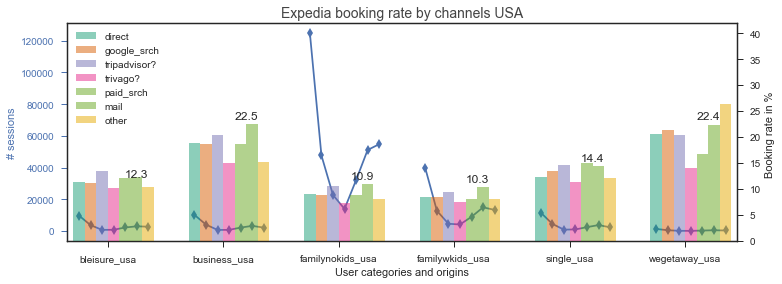

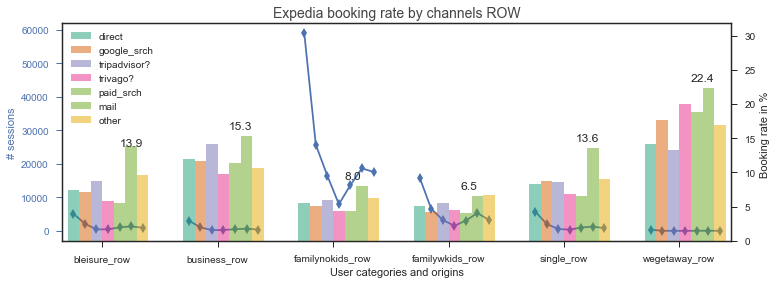

In [313]:
### 1 booking rate (BR) by channel cat by user category

# create dataframe

def df_br_usercat(df = ds_vs_train, region = 'USA'):     
    tds2 = df[['user_cat','channel_cat', 'is_session','is_booking','region_dest']]
    tds3 = tds2.groupby(['region_dest','channel_cat','user_cat'],as_index=False, axis=0).agg({'is_session': 'sum', 'is_booking': 'sum'})
    tds3['BR'] = np.round(tds3['is_booking']/tds3['is_session']*100,decimals=1)
    tds4=tds3[tds3['region_dest']==region]
    vector=tds4[['is_session']]  #tseries
    remove_col = ['region_dest','is_booking','is_session']
    tds4.drop(remove_col, inplace=True, axis=1)
    tds4=tds4.pivot(index='user_cat', columns='channel_cat', values='BR')
    tds4=tds4.reset_index(drop=False)  # drop an index and make it a col
    tlist=[tds4, vector, region]
    return tlist

# plot

def plot_br_usercat(tdf , tseries, region): 
    # Setting the positions and width for the bars
    pos = [0,1,2,3,4,5]
    #list(range(len(tdf.iloc[:,1])))
    width = 0.10 

    
    # Plotting the line
    fig, ax1, = plt.subplots(figsize=(12,4))

    t = np.arange(0, 42, 1)

    # taking the correct values from vector for bleisure, business... 6 iterations, 7 values
    # in position pos + some width buffer, 
    b=[0,6,12,18,24,30,36] 
    for i in range(0,len(pos)):
         a =[pos[i],pos[i]+width, pos[i]+2*width, pos[i]+3*width, pos[i]+4*width, pos[i]+5*width, pos[i]+6*width]
         c = [x+i for x in b]  
         d=tseries.iloc[c,0]
         ax1.plot(a,d, marker='d',color='b')
 
    ax1.set_xlabel('User categories and origins')

    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('# sessions', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()

    # Create a bar with direct data,
    # in position pos,
    plt.bar(pos, 
        #using tdf['direct'] data,
        tdf['direct'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#1b9e77', 
        #edgecolor='white',
        # with label the first value in user_cat
        label=tdf['user_cat'][0]) 

    # Create a bar with google_srch,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
        #using tdf['google_srch'] data,
        tdf['google_srch'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#d95f02', 
        #edgecolor='white',
        # with label the second value in user_cat
        label=tdf['user_cat'][1]) 

    # Create a bar with tripadvisor?,
    # in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos], 
        #using tdf['tripadvisor?'] data,
        tdf['tripadvisor?'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#7570b3',
        #edgecolor='white',
        # with label the third value in user_cat
        label=tdf['user_cat'][2]) 

    # Create a bar with trivago?,
    # in position pos + some width buffer,
    plt.bar([p + width*3 for p in pos], 
        #using tdf['trivago?'] data,
        tdf['trivago?'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#e7298a', 
        #edgecolor='white',
        # with label the fourth value in user_cat
        label=tdf['user_cat'][3]) 

    # Create a bar with 'paid_srch',
    # in position pos + some width buffer,
    plt.bar([p + width*4 for p in pos], 
        #using tdf['paid_srch'] data,
        tdf['paid_srch'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#66a61e', 
        #edgecolor='white',
        # with label the fifth value in user_cat
        label=tdf['user_cat'][4]) 

    # Create a bar with 'mail',
    # in position pos + some width buffer,
    plt.bar([p + width*5 for p in pos], 
        #using tdf['mail'] data,
        tdf['mail'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#66a61e',
        #edgecolor='white',
        # with label the sixth value in user_cat
        label=tdf['user_cat'][5]) 

    # Create a bar with 'other',
    # in position pos + some width buffer,
    plt.bar([p + width*6 for p in pos], 
        #using tdf['other'] data,
        tdf['other'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#e6ab02', 
        #edgecolor='white',
        # with label the fifth value in user_cat
        label=tdf['user_cat'][5]) 

    # Set the y axis label
    ax2.set_ylabel('Booking rate in % ')

    # Set the chart's title
    ax2.set_title('Expedia booking rate by channels '+region, size=14, color ='#444444')
    plt.text(0.4,  tdf.iloc[0,3]   ,tdf.iloc[0,3])
    plt.text(1.35, tdf.iloc[1,3]+1 ,tdf.iloc[1,3])
    plt.text(2.35, tdf.iloc[2,3]+1 ,tdf.iloc[2,3])
    plt.text(3.35, tdf.iloc[3,3]+1 ,tdf.iloc[3,3])
    plt.text(4.35, tdf.iloc[4,3]+1 ,tdf.iloc[4,3])
    plt.text(5.35, tdf.iloc[5,3]+1 ,tdf.iloc[5,3])

    # Set the position of the x ticks
    #ax1.tick_params('y', colors='b')
    ax2.set_xticks([p + 2.5 * width for p in pos])

    # Set the labels for the x ticks
    ax2.set_xticklabels(tdf['user_cat'])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*7)
    plt.ylim([0, max(tdf['direct'] + tdf['google_srch'] )])#+ tdf['tripadvisor?'])]) # + tdf['trivago?']+ tdf['paid_srch'])]) 

    # Adding the legend and showing the plot
    plt.legend(['direct', 'google_srch', 'tripadvisor?', 'trivago?','paid_srch','mail','other'  ], loc='upper left')
    #plt.grid()
    filename = 'BR_channels_'+region+'.png'
    plt.savefig(filename, transparent = True)
    return plt.show()


# plot BR USA

temp=df_br_usercat(df = ds_vs_train, region = 'USA')
plot_br_usercat(temp[0],temp[1],temp[2])

temp1=df_br_usercat(df = ds_vs_train, region = 'ROW')
plot_br_usercat(temp1[0],temp1[1],temp1[2])


In [347]:
### 2 comparison booking rate BR, prebooking % and churn%

# create dataframe

def df_br_churn(df=ds_vs_train,region='USA'):
    tds5=df[['user_cat','session_cat','is_booking', 'is_churn', 'is_prebooking', 'is_session', 'region_dest']] 
    tds6 = df.groupby(['region_dest','user_cat'],as_index=False, axis=0).agg({'is_session': 'sum','is_churn': 'sum', 'is_booking': 'sum','is_prebooking': 'sum'})
    tds6['BR'] = np.round(tds6['is_booking']/tds6['is_session']*100,decimals=0).astype(int)
    tds6['churn%'] = np.round(tds6['is_churn']/tds6['is_session']*100,decimals=0).astype(int)
    tds6['prebooking%'] = np.round(tds6['is_prebooking']/tds6['is_session']*100,decimals=0).astype(int)
    
    tds7=tds6[tds6['region_dest']==region]
    remove_col = ['region_dest','is_booking','is_prebooking','is_churn','is_session']
    tds7.drop(remove_col, inplace=True, axis=1)
    
    segment_data=tds7[['user_cat','BR','churn%']]
    segment_data['gap']=tds7['churn%']-tds7['BR']
    segment_data['min_str']=segment_data['BR'].astype(int).astype(str)
    segment_data['max_str']=segment_data['churn%'].astype(int).astype(str) 
    segment_data['gap_str']=segment_data['gap'].astype(int).astype(str) 
    segment_data.rename(columns={'user_cat':'country' ,'BR': 'min', 'churn%': 'max'}, inplace=True)
    

    tdf=tds7[['user_cat','BR', 'prebooking%','churn%']]
    point_data=pd.melt(tdf, id_vars='user_cat', var_name='age_group', value_name='sm_use_percent') 
    point_data['sm_use_percent_str']=point_data['sm_use_percent'].astype(int).astype(str) 
    point_data.rename(columns={'user_cat':'country'}, inplace=True)
    tlist=[segment_data, point_data, region]
    return tlist

# plot unable to plot in this environment. Plotting in testenv where I pip installed plotline.
# see plotline_chart.ipynb. I changed the name of the features to match the plotline code
# save USA and ROW plots
temp2=df_br_churn(ds_vs_train,region='USA')
# Save ds as a file 
file_to_save1 = 'segment_data_'+temp2[2]+'.csv'
temp2[0].to_csv(file_to_save1,sep = "|",index=False)
file_to_save2 = 'point_data_'+temp2[2]+'.csv'
temp2[1].to_csv(file_to_save2,sep = "|",index=False)

temp3=df_br_churn(ds_vs_train,region='ROW')
# Save ds as a file 
file_to_save1 = 'segment_data_'+temp3[2]+'.csv'
temp3[0].to_csv(file_to_save1,sep = "|",index=False)
file_to_save2 = 'point_data_'+temp3[2]+'.csv'
temp3[1].to_csv(file_to_save2,sep = "|",index=False)

In [ ]:
# test - correlation booking / prebooking Factor plot 
sns.factorplot(x='income_hh_cat', y='prop_starrating', hue='is_package',
                col='region_dest', data=temp2, kind="swarm");


In [102]:
### 3 Alluvial 1 chart channel_user_category_mobile_bw_los_session_cat

# this chart is created using RAW located at http://rawgraphs.io/
# create and save in currentfolder (8 files)

def alluvial_1 (df=ds_vs_train):
    #clean up
    tdf=df[['region_dest','season_cat','channel_cat','user_cat','is_mobile','BW_ss_cat', 'LOS_cat', 'session_cat']]
    # clean up
    tdf.loc[tdf['is_mobile']==0,'is_mobile_cat']='no mobile'  
    tdf.loc[tdf['is_mobile']==1,'is_mobile_cat']='mobile'  
    # tdf['user_cat'].replace(inplace=True,to_replace='_ROW',value='')
    tdf['user_cat'] = tdf['user_cat'].str.rstrip('_usa')
    tdf['user_cat'] = tdf['user_cat'].str.rstrip('_row')
    
    #save files
    
    dest=['ROW','USA']
    seas=['is_spring','is_summer','is_autumn','is_winter']
    for i in dest:
        for j in seas:         
            tdf2=tdf[(tdf['region_dest']==i) & (tdf['season_cat']==j)]
            remove_col = ['is_mobile', 'region_dest','season_cat']
            tdf2.drop(remove_col, inplace=True, axis=1)
            file_to_save = 'alluvial_1_'+i+'_'+j+'.csv'
            tdf2.to_csv(file_to_save,sep = "|",index=False)
            print('alluvial_1_',i,'_',j,'.csv saved')
    return print('done') 

alluvial_1()

alluvial_1_ ROW _ is_spring .csv saved
alluvial_1_ ROW _ is_summer .csv saved
alluvial_1_ ROW _ is_autumn .csv saved
alluvial_1_ ROW _ is_winter .csv saved
alluvial_1_ USA _ is_spring .csv saved
alluvial_1_ USA _ is_summer .csv saved
alluvial_1_ USA _ is_autumn .csv saved
alluvial_1_ USA _ is_winter .csv saved
done


In [152]:
# test channel origins, % and total
# due to some image manipulations for the above, I lost the ranked list of channels (which varies during the season).

tdf=ds_vs_train[['region_dest','season_cat','channel_cat','user_cat','is_mobile','BW_ss_cat', 'LOS_cat', 'session_cat' ]]
    # clean up
 
tdf.loc[tds8['is_mobile']==0,'is_mobile_cat']='no mobile'  
tdf.loc[tds8['is_mobile']==1,'is_mobile_cat']='mobile'  
tdf['user_cat'].replace(inplace=True,to_replace='_ROW',value='')
tdf['user_cat'].replace(inplace=True,to_replace='_USA',value='')

i='ROW'
j='is_winter'
tdf1=tdf[(tdf['region_dest']==i) & (tdf['season_cat']==j)]

print(len(tdf1['channel_cat']))
series=np.round(tdf1['channel_cat'].value_counts()/len(tdf1['channel_cat'])*100)
series

44792


direct          50.0
tripadvisor?    11.0
google_srch     10.0
paid_srch        9.0
trivago?         8.0
mail             8.0
other            4.0
Name: channel_cat, dtype: float64

In [165]:
### 4 Scatterplot income hh sensitivity by season (8)

# Option 1: save those scatter for display using RAW (did not work: RAW is too slow)
def scatterplot_1 (df=ds_vs_train):
 
    tdf=df[['region_dest','user_cat','prop_starrating','hist_price_band', 'is_package','season_cat', 'income_hh_cat']]
    #clean up
    tdf['user_cat'] = tdf['user_cat'].str.rstrip('_usa')
    tdf['user_cat'] = tdf['user_cat'].str.rstrip('_row')
    dest=['ROW','USA']
    seas=['is_spring','is_summer','is_autumn','is_winter']
    for i in dest:
        for j in seas:         
            tdf2=tdf[(tdf['region_dest']==i) & (tdf['season_cat']==j)]
            remove_col = ['region_dest','season_cat']
            tdf2.drop(remove_col, inplace=True, axis=1)
            file_to_save = 'scatter_1_'+i+'_'+j+'.csv'
            tdf2.to_csv(file_to_save,sep = "|",index=False)
            print('scatter_1_',i,'_',j,'.csv saved')
            print(len(tdf2))
    return print('done')

scatterplot_1 (df=ds_vs_train)

scatter_1_ ROW _ is_spring .csv saved
56957
scatter_1_ ROW _ is_summer .csv saved
72335
scatter_1_ ROW _ is_autumn .csv saved
55295
scatter_1_ ROW _ is_winter .csv saved
44792
scatter_1_ USA _ is_spring .csv saved
121379
scatter_1_ USA _ is_summer .csv saved
168160
scatter_1_ USA _ is_autumn .csv saved
127683
scatter_1_ USA _ is_winter .csv saved
102471
done


In [315]:
# Option 2: # select random users before performing scatterplot (did not work: RAW is too slow)

tds11=random_users_df(ds_vs_train.user_id,2, 3/100)
tds11.info()
tds12=pd.merge(tds11,ds_vs_train,how='inner',on='user_id')
tds13=tds12[['is_session','region_dest','user_cat','prop_starrating','hist_price_band', 'is_package', 'income_hh', 'income_hh_cat']]
tds13['user_cat'] = tds13['user_cat'].str.rstrip('_usa')
tds13['user_cat'] = tds13['user_cat'].str.rstrip('_row')

#save files
file_to_save = 'scatterplot_sample.csv'
tds13.to_csv(file_to_save,sep = "|",index=False)
tds13.head(1)

unique users: 58439  test 0.03 : 1753  train 0.97 : 56686
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 1 columns):
user_id    1753 non-null int64
dtypes: int64(1)
memory usage: 13.8 KB


,is_session,region_dest,user_cat,prop_starrating,hist_price_band,is_package,income_hh,income_hh_cat
0,1,USA,familywkid,2,H,0,24457.0,less27K


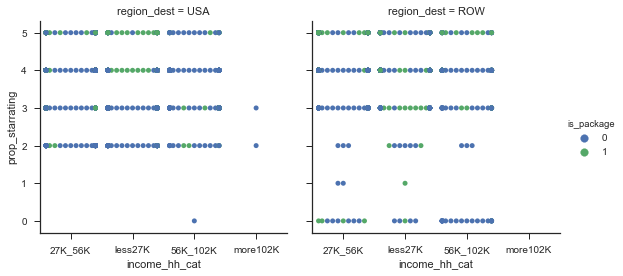

In [206]:
### Option 3  select 1st 4000 lines (quick and dirty)
temp1=ds_vs_train[['is_session','region_dest','user_cat','prop_starrating','hist_price_band', 'is_package', 'income_hh', 'income_hh_cat']]
#'season_cat', 'LOS_cat', 

temp2=temp1.loc[:4000,:]
temp2['user_cat'] = temp2['user_cat'].str.rstrip('_usa')
temp2['user_cat'] = temp2['user_cat'].str.rstrip('_row')
temp2

# 3.1 Factor plot 
sns.factorplot(x='income_hh_cat', y='prop_starrating', hue='is_package',
                col='region_dest', data=temp2, kind="swarm");



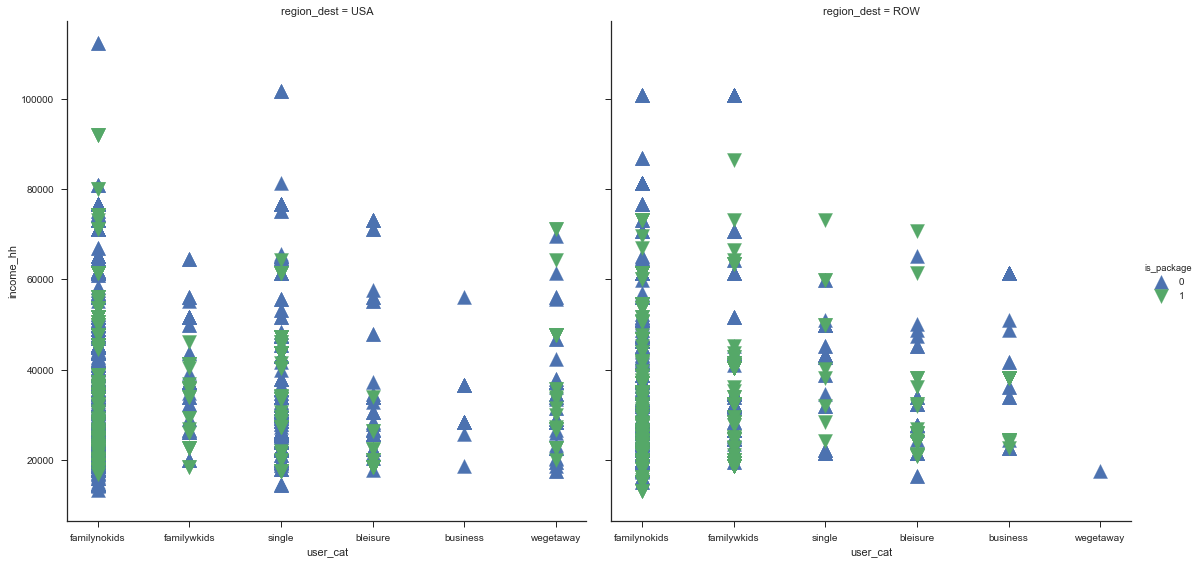

In [225]:
# 3.2 FacetGrid 

g = sns.FacetGrid(temp2, col='region_dest', hue='is_package',palette=current_palette,size=8,
                   hue_kws=dict(marker=["^", "v"]) )
g = (g.map(plt.scatter, 'user_cat', 'income_hh', s=200)
     .add_legend())

### 4 Categorical random forest (on hold) 

In [ ]:
###### Methodological approach. 

In [321]:
###### generate df for ML1

# binarize col

          
features = [
            ('channel_cat', [LabelBinarizer()]), 
            ('user_cat',    [LabelBinarizer()]),
            ('region_dest', [LabelBinarizer()]),
            ('srch_adults_cnt',           None),
            ('srch_children_cnt',         None),
            ('srch_rm_cnt',               None),
            ('cnt',                       None),
            ('srch_destination_id',       None),  
            ('season_cat',  [LabelBinarizer()]), 
            ('month_ss',                  None),
            ('day_ss',                    None),
            (['BW_ss'],     [StandardScaler()]),
            ('BW_ss_cat',   [LabelBinarizer()]),
            ('month_ci',                  None),
            ('day_ci',                    None),
            ('month_co',                  None),
            ('day_co',                    None),
            ('LOS_cat',     [LabelBinarizer()]), 
            (['LOS'],         [StandardScaler()]),
            ('is_satsun',                 None),
            ('is_monfri',                 None),
            (['income_hh'], [StandardScaler()]),
            ('income_hh_cat',[LabelBinarizer()]),
            ('package_income_t',          None),
            ('mobile_BW_t',               None) 
]

# ('is_booking',                None)

mapper1 = DataFrameMapper(features, default=False,df_out=True) # drops unselected col

ds_ML1=mapper1.fit_transform(X_train)

# note 1: did not include for ML1 
#('hotel_id',None),('prop_is_branded',None),('prop_starrating',None),('cluster_id',None)
# origin-distance-destination cat : some NAN values to fill. 

# note 2: ordinal: 'season_cat','LOS_cat', 'BW_ss_cat', 'income_hh_cat' consider keeping as is?


In [ ]:
### 1) We ensure complete separation between TEST and TRAIN

##1.1 We split our dataset between training and test. X_train, y_train and X_test, y_test

#done

In [ ]:
def random_users_df(dfsplitcol,seed,split,split_type='test'):    # seed = int, split = %, split_type ='test' or 'validation'
    users = np.unique(dfsplitcol.values )
    num_users = dfsplitcol.nunique()
    num_users_test=round(num_users*split)
    np.random.RandomState(seed)
    random_users_test = np.random.choice(users, replace=False, size=num_users_test)
    tdf=pd.DataFrame(random_users_test)
    tdf.columns=['user_id']
    
    print('unique users:',num_users,' ',split_type,' ',split,':', num_users_test,' train',1-split,':', num_users-num_users_test)
    return tdf

##### Archive

In [ ]:
# Hot encode 

gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(
                              poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, 
                            columns=gen_feature_labels)



#nominal
'user_cat', 
'channel_cat', 
'region_dest',

# last three are optional: + remove unbalance data (quantile) and model sensitivity (LOS, BW, income_hh)
# if not hot encoded, need to remove 'LOS','BW_ss','income_hh' from below category

In [100]:
# this is a test
dftest = pd.DataFrame({'pets':['cat', 'dog', 'cat', 'monkey', 'dog', 'dog'],\
                       'owner':['Champ', 'Ron', 'Brick', 'Champ', 'Veronica', 'Ron'],\
                       'location':['San_Diego', 'New_York', 'New_York', 'San_Diego', 'San_Diego', 'New_York']
                      })

dftest['pets'].replace(inplace=True,to_replace='cat',value='monster')
dftest['pets'] = dftest['pets'].str.rstrip('key')
dftest

,pets,owner,location
0,monster,Champ,San_Diego
1,dog,Ron,New_York
2,monster,Brick,New_York
3,mon,Champ,San_Diego
4,dog,Veronica,San_Diego
5,dog,Ron,New_York
